## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date, datetime, time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



C:\Users\Микола\AppData\Local\Temp\ipykernel_7256\3644844363.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, index_col=0)
  return data


In [3]:
data = get_data('./motorbike_ambulance_calls.csv')

print("main info", data.describe())
print("shape of dataset", data.shape)


main info                  yr          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.502561      6.537775     11.546752      0.028770      3.003683   
std        0.500008      3.438776      6.914405      0.167165      2.005771   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000      4.000000      6.000000      0.000000      1.000000   
50%        1.000000      7.000000     12.000000      0.000000      3.000000   
75%        1.000000     10.000000     18.000000      0.000000      5.000000   
max        1.000000     12.000000     23.000000      1.000000      6.000000   

         workingday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      0.496987      0.475775      0.627229   
std        0.465431      0.639357      0.

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [4]:
for col in data.columns:
    print(f"{col}: {data[col].count()}, type: {data[col].dtype}")

date: 17379, type: object
season: 17379, type: object
yr: 17379, type: int64
mnth: 17379, type: int64
hr: 17379, type: int64
holiday: 17379, type: int64
weekday: 17379, type: int64
workingday: 17379, type: int64
weathersit: 17379, type: int64
temp: 17379, type: float64
atemp: 17379, type: float64
hum: 17379, type: float64
windspeed: 17379, type: float64
cnt: 17379, type: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [5]:
mising_values = data.isna().sum()
print('mising_values', mising_values)

mising_values date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1. Розмірність датасету 17379 рядків і 14 колонок
2. Кількість даних по кожній змінній співпадає
3. Можемо зробити висновок, що усі змінні цілісні і не мають пропусків



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [6]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    time_list = []
    datetime_list = []

    for hr in df['hr']:
        time_list.append(hr)

    for i,date_time in enumerate(df[date_col_name]):
        month, day, year = date_time.split("/")
        month = int(month)
        day = int(day)
        year = int(year)
        new_date = date(year, month, day)
        created_time = time(time_list[i], 0)
        new_datetime = datetime.combine(new_date, created_time) 
        datetime_list.append(new_datetime)
    return df, datetime_list
  
data, datetime_list = tranform_date(data, 'date')
data['date_type'] = datetime_list

last_datetime_obj = datetime_list[len(datetime_list) - 1]
first_datetime_obj = datetime_list[0]

time_interval = last_datetime_obj - first_datetime_obj
print('time_interval', time_interval)
print(data['date_type'])


time_interval 730 days, 23:00:00
index
1        0011-01-01 00:00:00
2        0011-01-01 01:00:00
3        0011-01-01 02:00:00
4        0011-01-01 03:00:00
5        0011-01-01 04:00:00
                ...         
17375    0012-12-31 19:00:00
17376    0012-12-31 20:00:00
17377    0012-12-31 21:00:00
17378    0012-12-31 22:00:00
17379    0012-12-31 23:00:00
Name: date_type, Length: 17379, dtype: object


In [7]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].iat[0]
  last_day = df[date_col_name].iat[len(df) - 1]
  print(f" First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, 'date_type')

 First day of dataset - 0011-01-01 00:00:00.
 Last day of dataset - 0012-12-31 23:00:00


#Аналіз категоріальних змінних

Можемо зробити висновок, що дійсно дані мають на два роки інтервал

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [8]:
categorial_columns = ['season', 'yr', 'hr', 'weekday', 'workingday', 'weathersit', 'holiday', 'mnth']
data_categorical = data[categorial_columns]

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [9]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  seasons_list = []
  for season in df[season_col_name]:
    
      if season =='spring':
        seasons_list.append(1)

      elif season == 'summer':
        seasons_list.append(2)

      elif season == 'autumn':
        seasons_list.append(3)
        
      else:
        seasons_list.append(4)

  df[season_col_name] = seasons_list
  return df
  
data = encode_season(data, 'season')
print(data['season'])

index
1        1
2        1
3        1
4        1
5        1
        ..
17375    1
17376    1
17377    1
17378    1
17379    1
Name: season, Length: 17379, dtype: int64


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

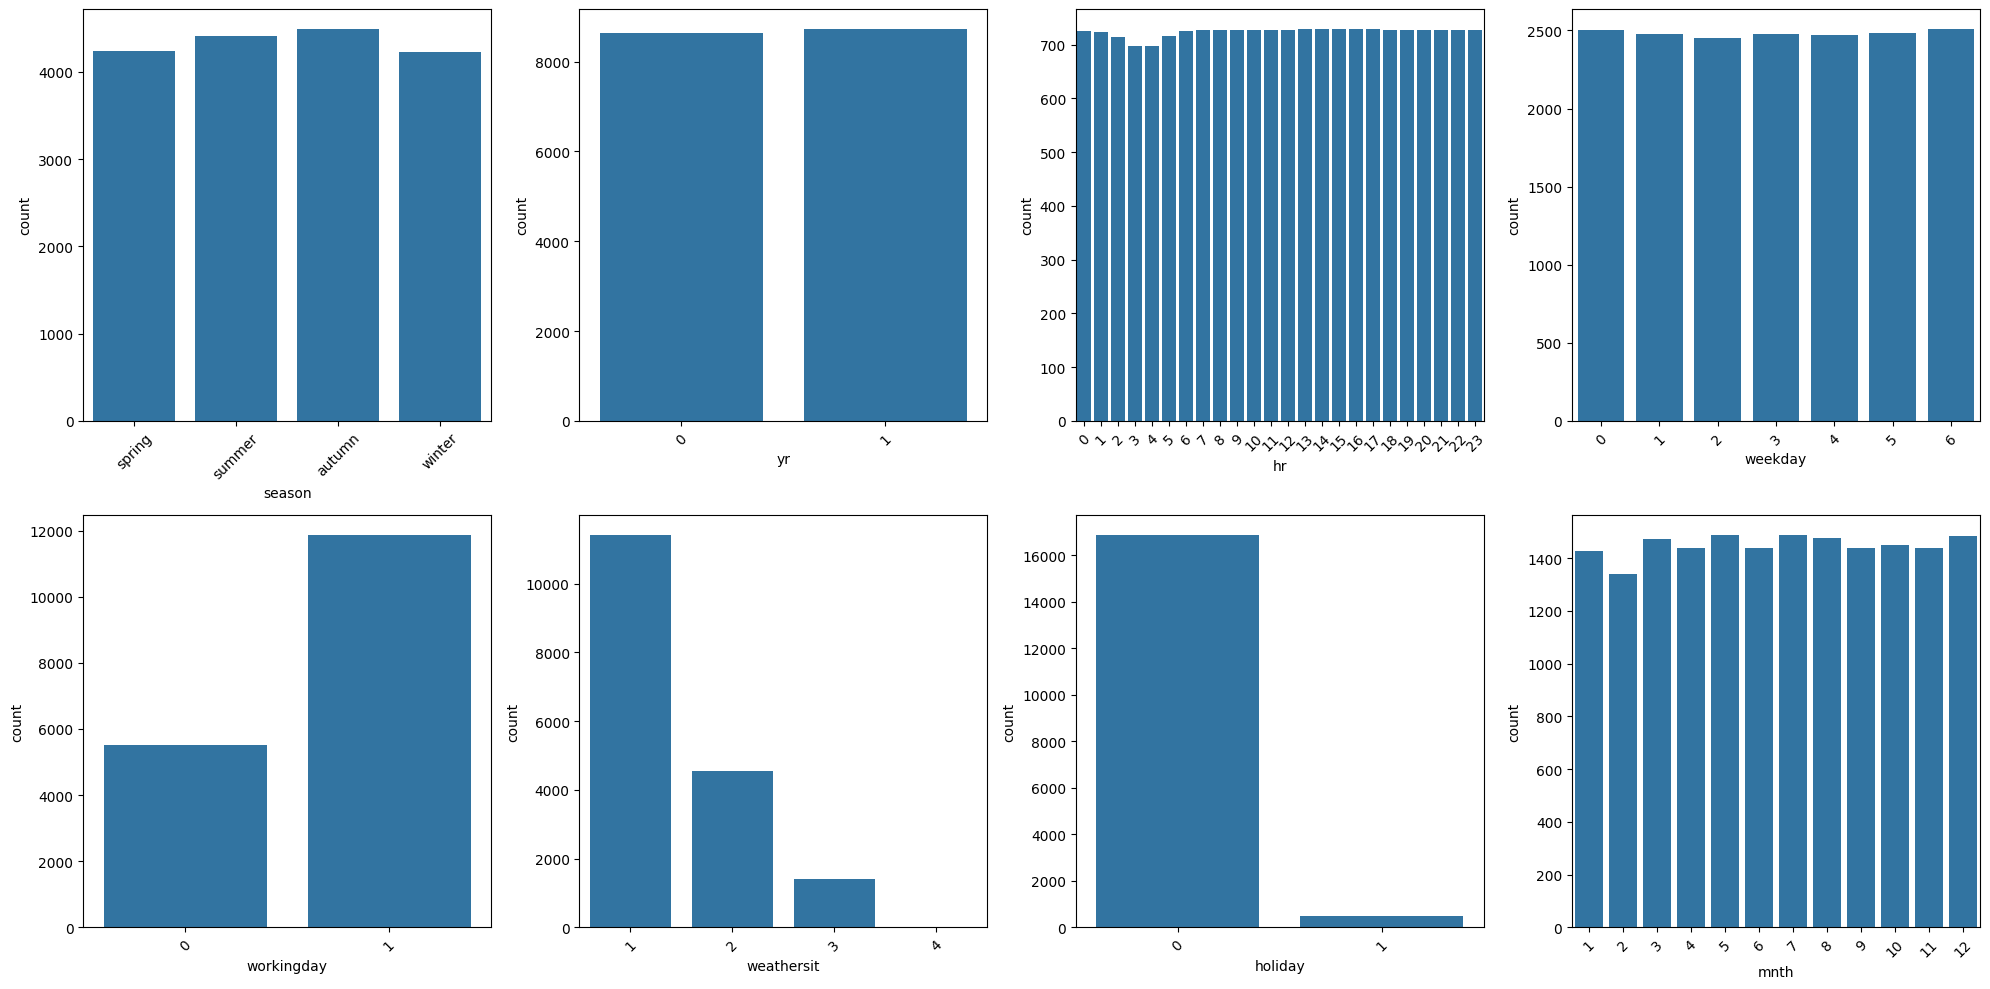

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10)) 

for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(x=variable, data=data_categorical, ax=subplot)
    for label in subplot.get_xticklabels(): 
        label.set_rotation(45) 

plt.tight_layout() 
plt.show()

**Висновки з 5-7 завдання (детальні)**



1. З 5 завдання можемо зробити висновок, що колонки, які у нас є категоріальними у цьому датасеті є: season, date, hour, weekday, month, holiday, weathershit, year 
2. З 6 завдання можемо зробити висновок, що колонку season варто змінити з типу string на тип int тобто зробити її категоріальною
3. З 7 завдання можемо зробити висновок, що практично всі графіки розподілені однаково, разюча різниця є лише на графіках з workingday,<br/>
    тобто частіше швидку допомогу викликали у робочі дні, ніж у вихідні. Це і очікувано, тому що робочих днів більше, ніж вихідних.<br/>
    Цікавим є висновок у графіку weathershit, тому що кількість викликів швидкої найбільше була не в ті дні, коли надворі була негода, а тоді, коли були хороші погодні умови. 



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [11]:
numerical_cols = ['atemp', 'temp', 'hum', 'windspeed', 'hr', 'cnt']

data_numerical = data[numerical_cols]
print('data_numerical', data_numerical)

data_numerical         atemp  temp   hum  windspeed  hr  cnt
index                                        
1      0.2879  0.24  0.81     0.0000   0   16
2      0.2727  0.22  0.80     0.0000   1   40
3      0.2727  0.22  0.80     0.0000   2   32
4      0.2879  0.24  0.75     0.0000   3   13
5      0.2879  0.24  0.75     0.0000   4    1
...       ...   ...   ...        ...  ..  ...
17375  0.2576  0.26  0.60     0.1642  19  119
17376  0.2576  0.26  0.60     0.1642  20   89
17377  0.2576  0.26  0.60     0.1642  21   90
17378  0.2727  0.26  0.56     0.1343  22   61
17379  0.2727  0.26  0.65     0.1343  23   49

[17379 rows x 6 columns]


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

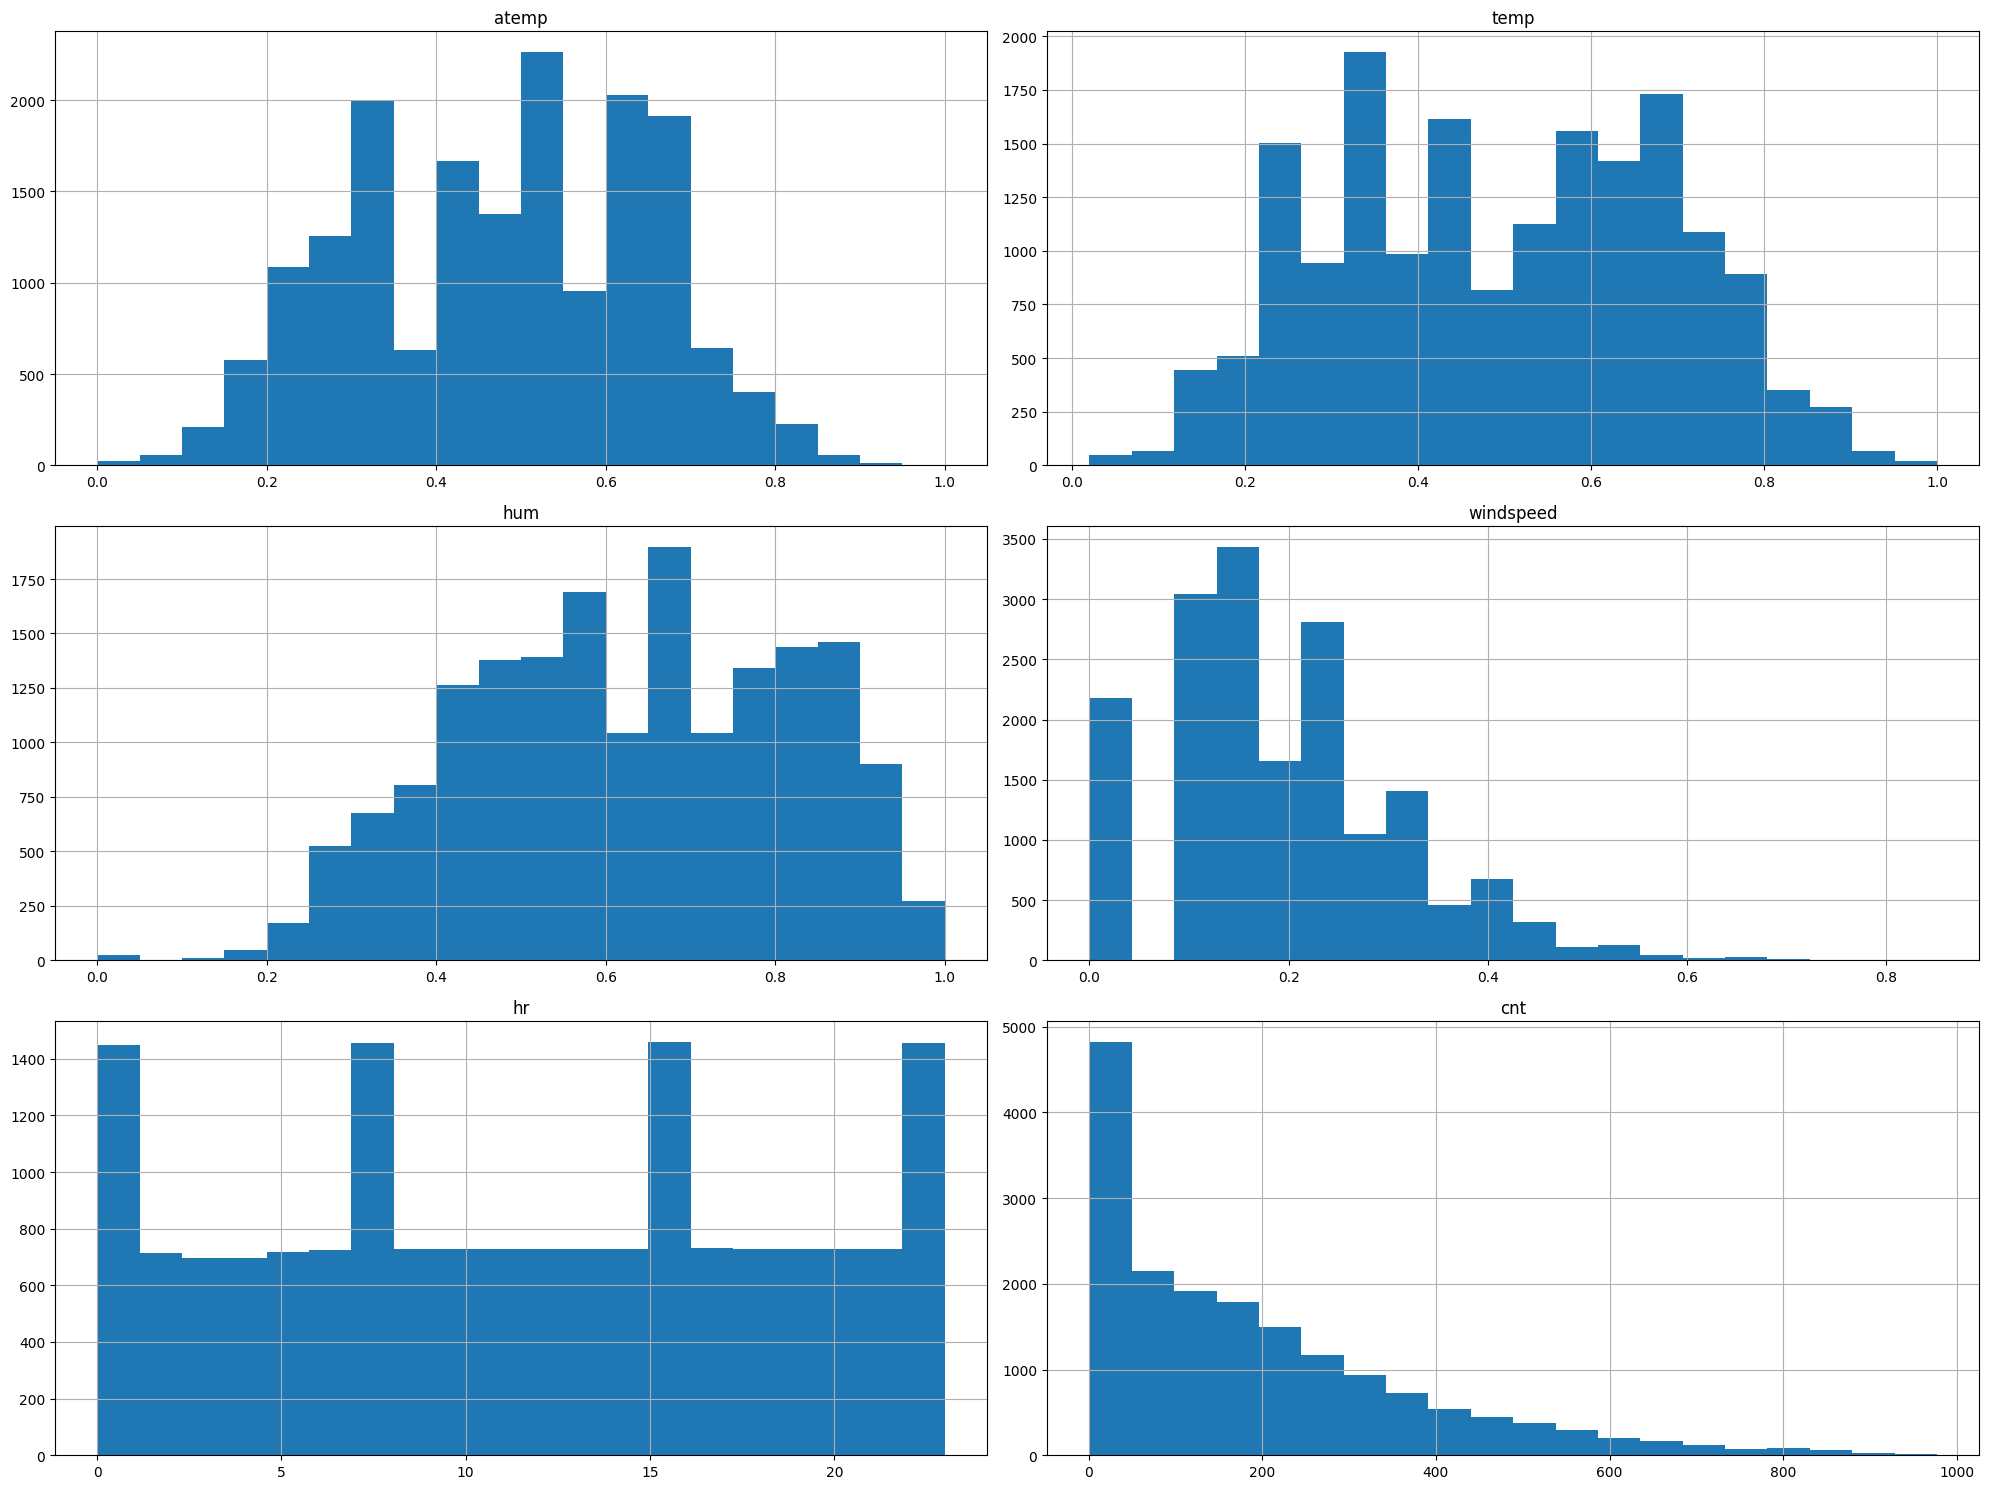

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

for variable, subplot in zip(data_numerical, ax.flatten()):
    data_numerical[variable].hist(ax=subplot, bins=20)
    subplot.set_title(variable)

plt.tight_layout() 
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

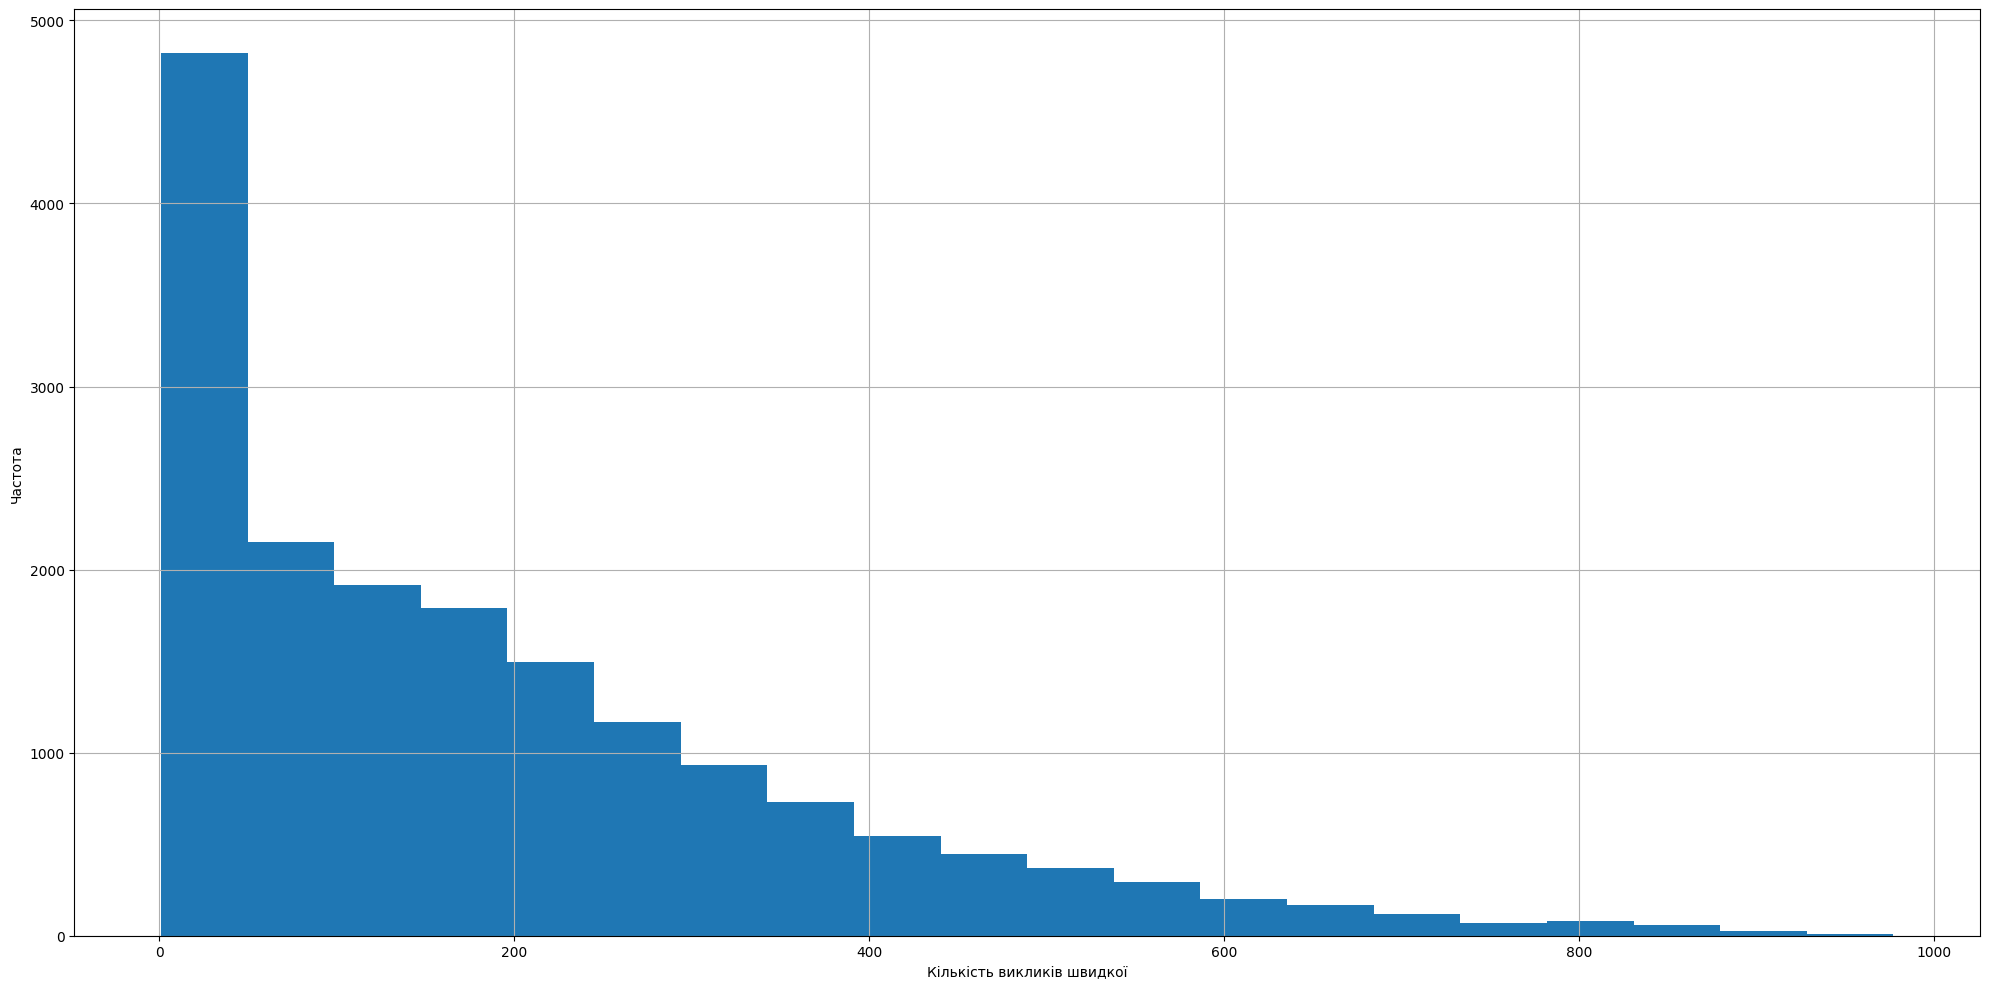

slope coefficient 0.010064609532772014


In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
data['cnt'].hist(ax=ax, bins=20)


plt.xlabel("Кількість викликів швидкої")
plt.ylabel("Частота")
plt.tight_layout() 
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(data.index, data['cnt'])
print('slope coefficient', slope)

**Висновки з 8-10 завдання (детальні)**



1. З 8 завдання такий висновок: Ось такі колонки можна визначити як числові змінні 'atemp', 'temp', 'hum', 'windspeed', 'hr'.
2. З 9 завдання на графіку hr можна зробити висновок що найбільші піки кількості викликів швидкої були тоді у час-пік і у ранні і у пізні години
3. З 10 завдання розподіл близький до експоненціального і коефіцієнт нахилу дорівнює  0.01006



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

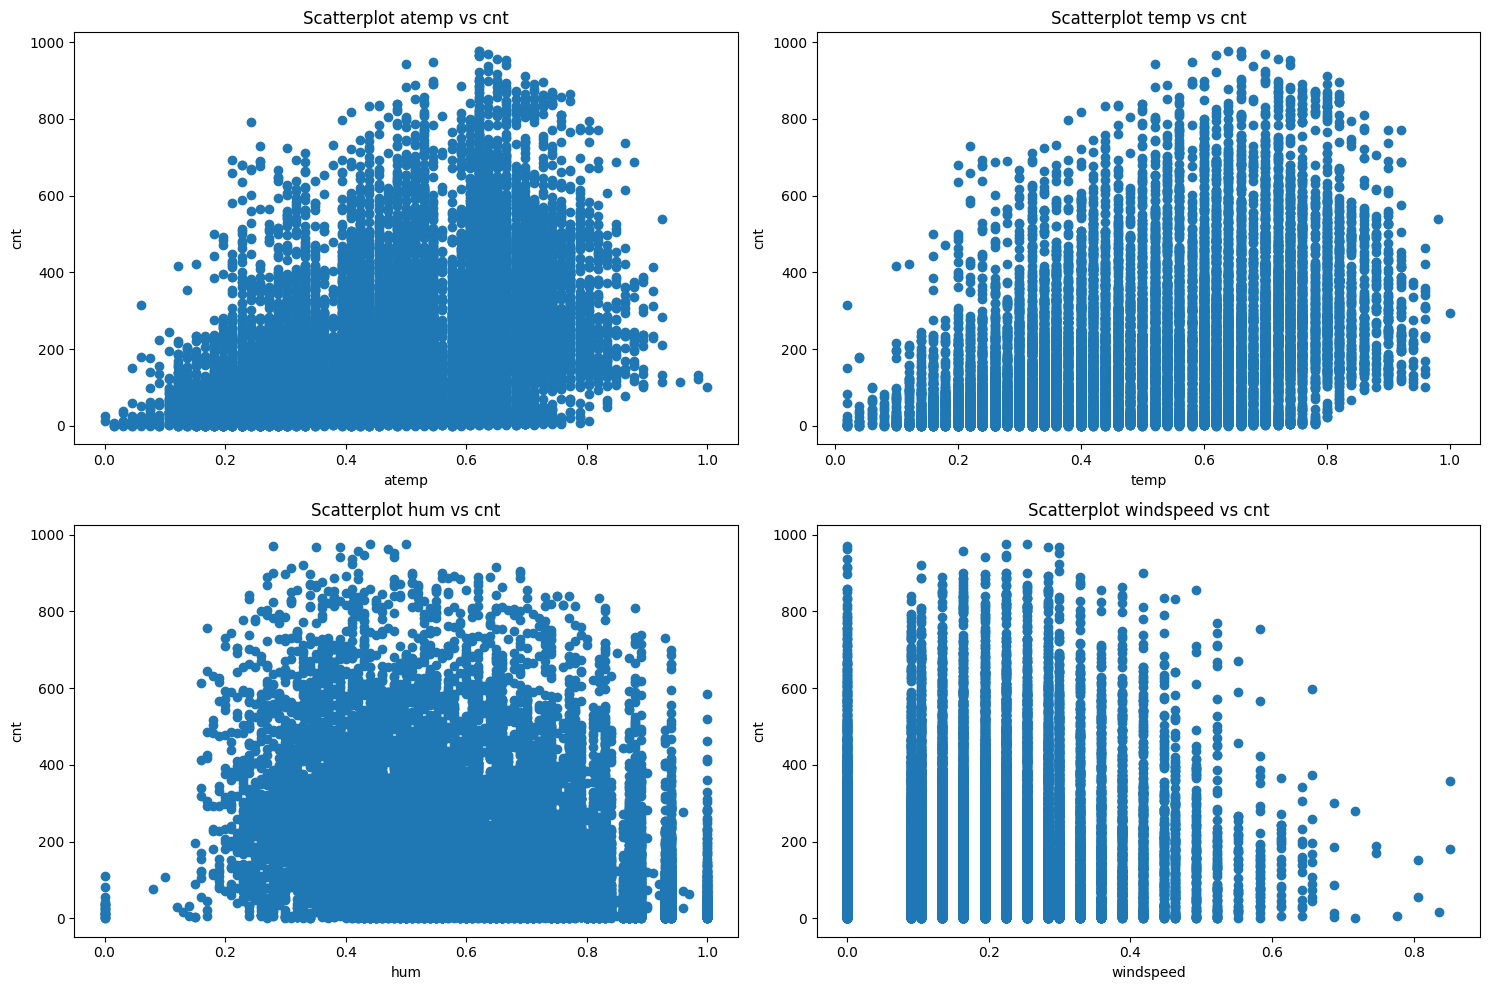

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  subplot.scatter(data_numerical[var], data_numerical['cnt'])
  subplot.set_title(f'Scatterplot {var} vs cnt')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')  

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

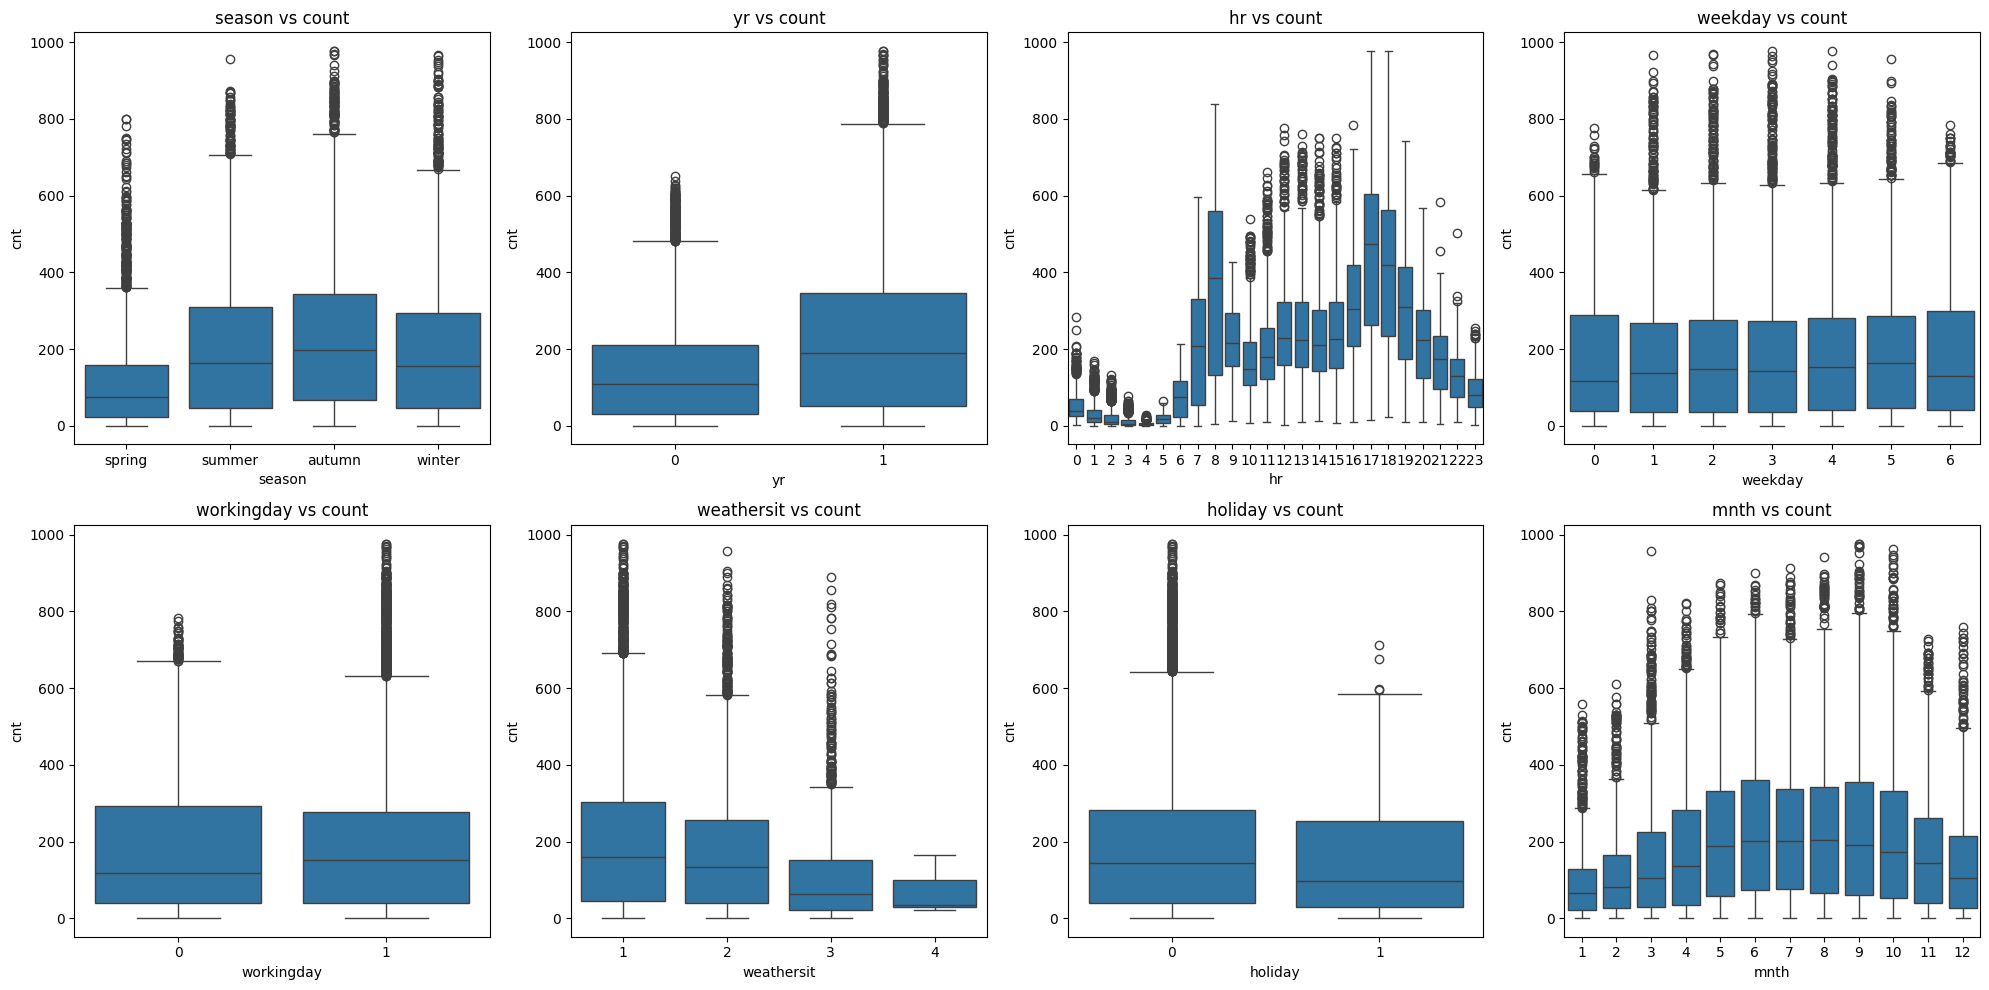

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=data_categorical[var], y=data['cnt'], ax=subplot)
  subplot.set_title(f"{var} vs count")
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1. Можна зробити висновок, що людей в колцентрі для швидкої треба більше людей о 7-8 годині ранку і 5-7 годині вечора, тому що стає багато аварій, а потім можна розпускати людей



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

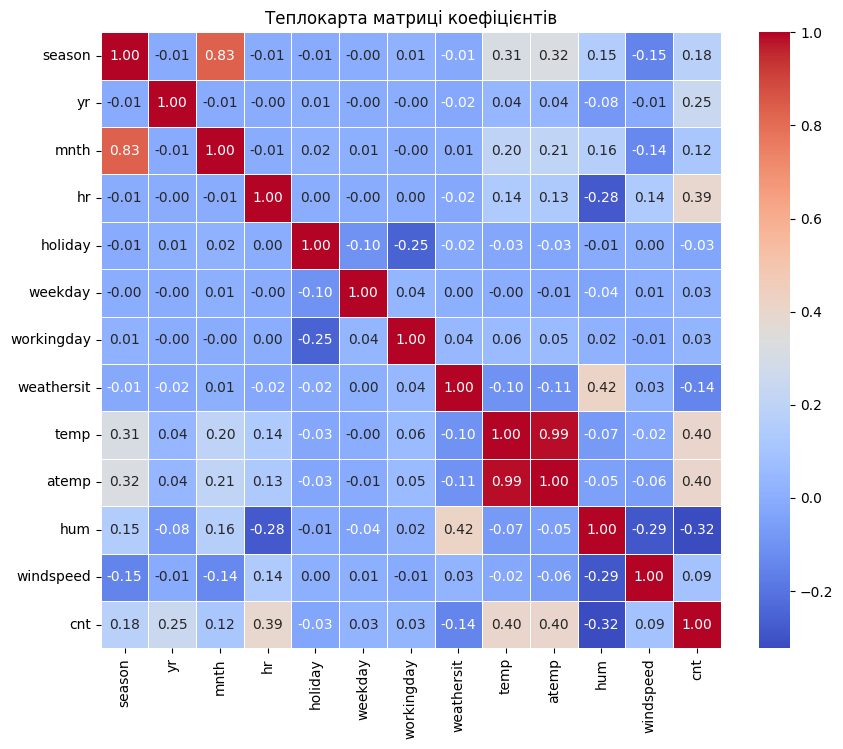

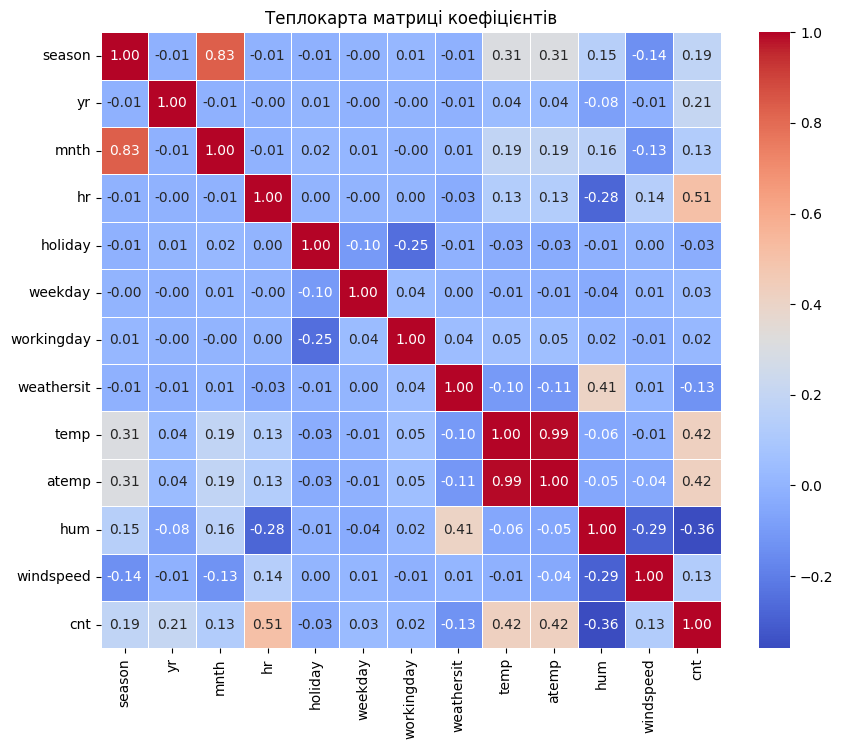

In [16]:
df_copy = data

df_copy_filtered = df_copy.drop(columns=['date', 'date_type']) 
correlation_matrix_pearson = df_copy_filtered.corr(method="pearson")

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Теплокарта матриці коефіцієнтів")
plt.show()

correlationa_matrix_speerman = df_copy_filtered.corr(method="spearman")

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlationa_matrix_speerman, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Теплокарта матриці коефіцієнтів")
plt.show()

Висока кореляція є між колонкою atemp і temp, тому колонку atemp, швидше за все, потрібно буде вилучити.<br/>
Різниця між методами полягає в тому, що метод пірсона використовується для лінійних зв'язків, а метод спірмана може використовуватися і для нелінійних і монотонних 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [17]:
def get_dummies(df: pd.DataFrame):
  for var in categorial_columns:
    dummies = pd.get_dummies(df[var], prefix=var)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(var, axis=1)

  return df

In [18]:
features = get_dummies(data)
print('features', features)

features            date  temp   atemp   hum  windspeed  cnt            date_type  \
index                                                                      
1        1/1/11  0.24  0.2879  0.81     0.0000   16  0011-01-01 00:00:00   
2        1/1/11  0.22  0.2727  0.80     0.0000   40  0011-01-01 01:00:00   
3        1/1/11  0.22  0.2727  0.80     0.0000   32  0011-01-01 02:00:00   
4        1/1/11  0.24  0.2879  0.75     0.0000   13  0011-01-01 03:00:00   
5        1/1/11  0.24  0.2879  0.75     0.0000    1  0011-01-01 04:00:00   
...         ...   ...     ...   ...        ...  ...                  ...   
17375  12/31/12  0.26  0.2576  0.60     0.1642  119  0012-12-31 19:00:00   
17376  12/31/12  0.26  0.2576  0.60     0.1642   89  0012-12-31 20:00:00   
17377  12/31/12  0.26  0.2576  0.60     0.1642   90  0012-12-31 21:00:00   
17378  12/31/12  0.26  0.2727  0.56     0.1343   61  0012-12-31 22:00:00   
17379  12/31/12  0.26  0.2727  0.65     0.1343   49  0012-12-31 23:00:00   

  

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [19]:
night_hours = [18, 19, 20, 21, 22, 23, 0, 1, 2, 3]
features['night_hours'] = data['hr'].map(lambda hr: 0 if night_hours.count(hr) == 0 else 1)
print(features['night_hours'])

index
1        1
2        1
3        1
4        1
5        0
        ..
17375    1
17376    1
17377    1
17378    1
17379    1
Name: night_hours, Length: 17379, dtype: int64


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [20]:
features_lr = features.drop(['season_1', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

Змінну date ми вилучаємо через те, що вона не потрібна для обчислень, для машинного навчання комп'ютер<br/>
краще сприймає категоріальні зміннні або числові, крім того ця дата є у форматі рік/місяць/день, а унас є змінні yr, mnth, hr, тому у цьому випадку<br/>
колонка date стає непотрібною<br/>
Змінну atemp ми вилучаємо для того щоб не було мультиколінеарності, бо змінна atemp має високу кореляцію<br/>
зі змінною temp

In [21]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target, 'date_type'], axis=1)
  y = df[target] 
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [25]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [27]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10451.189, test: 10100.280
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

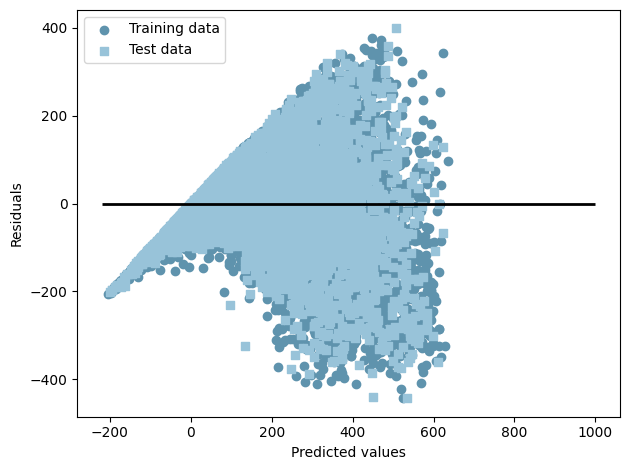

In [28]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Точність моделі 0.68, що дає висновок на те, що можливо, модель потрібно буде переглянути і покращити точність 
2. Тренуваьльні і тестові дані накладаються один на одного, що означає, що між ними невелика різниця 
3. Також у нас є викиди, які з'являються через те, що якщо модель прогнозує значення, яке вище за фактичне значення, то воно буде відповідно від'ємним

